# Lielo valodas modeļu izmantošana CQL (Corpus Query Language) vaicājumu ģenerēšanai marķētos teksta korpusos

## Testa kopas izveidošana
### CQL vaicājumu ģenerēšana ar skripta failu
Ar skriptu uzģenerēt dažādu tipu CQL vaicājumus.

In [2]:
import random
import json
# import csv

LEMMAS = {
    'noun': [
        'māja', 'darbs', 'valsts', 'cilvēks', 'gads', 'diena', 'sirds', 'jūra', 'mežs', 'piens',
        'brīvība', 'mieži', 'brilles', 'eksāmens', 'valsts', 'laiks', 'bēdas', 'gads', 'jautājums', 
        'darbs', 'bērns', 'veids', 'Latvija', 'Jānis', 'Saeima', 'amats', 'biedrība', 'gals', 
        'novembris', 'pētījums', 'nauda', 'koks', 'kolēģis', 'saruna', 'dānija', 'spilgts',
        'laboratorija', 'garantija', 'jēga', 'slepkavība', 'tulkotāja', 'trusis', 'lūsis',
        'bojāgājušais', 'dienvidaustrumi', 'čuguns', 'maršs', 'reformācija', 'daļa', 'projekts',
    ],
    'verb': [
        'būt', 'iet', 'darīt', 'redzēt', 'zināt', 'nākt', 'sākt', 'dzīvot', 'mīlēt', 'rakstīt', 'noteikt', 
        'ņemt', 'pieņemt', 'sākt', 'gūt', 'iegūt', 'atbalstīt', 'saņemt', 'izmantot', 'veikt', 'precizēt',
        'nodrošināt', 'atrasties', 'piederēt', 'skriet', 'ēst', 'dziedāt', 'žāvāties', 'tumst', 'gulēt', 
        'sēdēt', 'salt', 'svīst', 'prast', 'ciest', 'just', 'ļaut', 'lūgt', 'vajadzēt', 'gribēt',
        'runāt', 'teikt', 'sacīt', 'stāstīt', 'lēkt', 'bēgt', 'dejot', 'klupt', 'soļot', 'šņākt', 'rībēt',
        'dzirdēt', 'vērot', 'atcerēties', 'spēt', 'varēt' 
    ],
    'adj':  [
        'liels', 'mazs', 'jauns', 'balts', 'melns', 'skaists', 'augsts', 'labs', 'slikts', 'garš', 'īsts', 
        'patiess', 'neglīts', 'pareizs', 'nepareizs', 'nepieciešams', 'svarīgs', 'vecs', 'auksts', 'karsts',
        'daļējs', 'vasarīgs', 'neliels', 'vidējs', 'sens', 'apaļš', 'trijstūrains', 'garens', 'plats', 'šaurs',
        'dzeltens', 'sarkans', 'zils', 'zaļš', 'brūns'
    ],
    'adv': [
        'te', 'šeit', 'tur', 'turp', 'kur', 'kurp', 'šur', 'šurp', 'citur', 'nekur', 'zemē', 'virsū', 'pretī', 
        'mājup', 'augšup', 'lejup', 'kad', 'tad', 'tagad', 'tikko', 'vēlāk', 'parīt', 'aizvakar', 'šobrīd', 
        'šonedēļ', 'togad', 'toreiz', 'nākamnedēļ', 'kā', 'tā', 'šā', 'šādi', 'veikli', 'ātri', 'sāņus', 
        'blakus', 'žēl', 'vienalga', 'auksti', 'karsti', 'cik', 'tik', 'daudz', 'pamaz', 'mazliet', 'drusku', 
        'diezgan', 'pārāk', 'divreiz', 'vismaz', 'kāpēc', 'kādēļ', 'kālab', 'tāpēc', 'tādēļ', 'tālab'
    ]
}

TAG_MAP = [
    {"cql": "n.*", "nl": "noun", "lv": "lietvārds"},
    {"cql": "n.m.*", "nl": "masculine noun", "lv": "vīriešu dzimtes lietvārds"},
    {"cql": "n.f.*", "nl": "feminine noun", "lv": "sieviešu dzimtes lietvārds"},
    {"cql": "v.*", "nl": "verb", "lv": "darbības vārds"},
    {"cql": "a.*", "nl": "adjective", "lv": "īpašības vārds"},
    {"cql": "r.*", "nl": "adverb", "lv": "apstākļa vārds"},
    {"cql": "c.*", "nl": "conjunction", "lv": "saiklis"},
    {"cql": "p.*", "nl": "pronoun", "lv": "vietniekvārds"},
    {"cql": "m.*", "nl": "numeral", "lv": "skaitļa vārds"},
    {"cql": "q.*", "nl": "particle", "lv": "partikula"},
    {"cql": "i.*", "nl": "interjection", "lv": "izsaukuma vārds"},
    {"cql": "y.*", "nl": "abbreviation", "lv": "saīsinājums"},
    {"cql": "s.*", "nl": "preposition", "lv": "prepozīcija"},
    {"cql": "z.*", "nl": "punctuation", "lv": "pieturzīme"},
    {"cql": "x.*", "nl": "residual", "lv": "bezmorfoloģijas elements"},
]

PARTS = {
    'suffix': ['nieks', 'īgs', 'ot', 'oties', 'ams', 'āms', 'usi', 'eklis', 'dams', 'damies' ],
    'prefix': ['uz', 'sa', 'pret', 'pie', 'pēc', 'pār', 'pa', 'no', 'ne', 'iz', 'ie', 'caur', 'bez', 'at', 'ap', 'aiz'],
    'substring': ['simt', 'smit', 'māt', 'tēv', 'šan', 'pil', 'us', ]
}

# STRUCTURES = ["s", "p", "doc", "text"] 

templates = [
   {
        "type": "simple",
        "pattern": '[lemma="{lemma}"]',
        "nl_en": "Find all occurrences of the lemma '{lemma}'.",
        "nl_lv": "Atrast visus lemmas '{lemma}' gadījumus."
    },
    {
        "type": "simple",
        "pattern": '[word="{word}"]',
        "nl_en": "Search for the exact word form '{word}'.",
        "nl_lv": "Meklēt precīzu vārdformu '{word}'."
    },
    {
        "type": "simple",
        "pattern": '[tag="{tag}"]',
        "nl_en": "Find any {tag_desc}.",
        "nl_lv": "Atrast jebkuru {tag_desc_lv}."
    },
    {
        "type": "simple",
        "pattern": '[lemma="{lemma}" & tag="{tag}"]',
        "nl_en": "Find the lemma '{lemma}' specifically used as a {tag_desc}.",
        "nl_lv": "Atrast lemmu '{lemma}', kas lietota kā {tag_desc_lv}."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{lemma}"] [lemma="{lemma1}"]',
        "nl_en": "Find '{lemma}' followed immediately by '{lemma1}'.",
        "nl_lv": "Atrast '{lemma}', kam tieši seko '{lemma1}'."
    },
    {
        "type": "sequence",
        "pattern": '[tag="{tag1}"] [tag="{tag2}"]',
        "nl_en": "Find a {tag_desc1} followed immediately by a {tag_desc2}.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko {tag_desc2_lv}."
    },
    {
        "type": "sequence",
        "pattern": '[tag="{tag1}"] [tag="{tag2}"] [tag="{tag3}"]',
        "nl_en": "Find a {tag_desc1} followed by a {tag_desc2} and then a {tag_desc3}.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko {tag_desc2_lv} un tad {tag_desc3_lv}."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adj}"] [lemma="{noun}"]',
        "nl_en": "Find the adjective '{adj}' followed immediately by the noun '{noun}'.",
        "nl_lv": "Atrast īpašības vārdu '{adj}', kam tieši seko lietvārds '{noun}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{noun}"] [lemma="{verb}"]',
        "nl_en": "Find lemma '{noun}' followed immediately by lemma '{verb}'.",
        "nl_lv": "Atrast lemmu '{noun}', kam tieši seko lemma '{verb}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{verb}"] [lemma="{adj}"]',
        "nl_en": "Find lemma '{verb}' followed immediately by lemma '{adj}'.",
        "nl_lv": "Atrast lemmu '{verb}', kam tieši seko lemma '{adj}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adv}"] [lemma="{adj}"]',
        "nl_en": "Find lemma '{adv}' followed immediately by lemma '{adj}'.",
        "nl_lv": "Atrast lemmu '{adv}', kam tieši seko lemma '{adj}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adv}"] [lemma="{noun}"]',
        "nl_en": "Find the adverb '{adv}' followed immediately by the noun '{noun}'.",
        "nl_lv": "Atrast apstākļa vārdu '{adv}', kam tieši seko lietvārds '{noun}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adv}"] [lemma="{noun}"]',
        "nl_en": "Find '{adv}' followed immediately by '{noun}'.",
        "nl_lv": "Atrast '{adv}', kam seko '{noun}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{verb}"] [lemma="{verb}"]',
        "nl_en": "Find '{verb}' followed immediately by '{verb}'.",
        "nl_lv": "Atrast '{verb}', kam seko '{verb}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adj}"] [lemma="{adj}"]',
        "nl_en": "Find '{adj}' followed immediately by '{adj}'.",
        "nl_lv": "Atrast '{adj}', kam tieši seko '{adj}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adv}"] [lemma="{adv}"]',
        "nl_en": "Find '{adv}' followed immediately by '{adv}'.",
        "nl_lv": "Atrast '{adv}', kam tieši seko '{adv}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adj}"] [lemma="{verb}"]',
        "nl_en": "Find '{adj}' followed immediately by '{verb}'.",
        "nl_lv": "Atrast '{adj}', kam tieši seko '{verb}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{verb}"] [lemma="{adj}"]',
        "nl_en": "Find '{verb}' followed immediately by '{adj}'.",
        "nl_lv": "Atrast '{verb}', kam seko '{adj}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{adv}"] [lemma="{verb}"]',
        "nl_en": "Find '{adv}' followed immediately by '{verb}'.",
        "nl_lv": "Atrast '{adv}', kam seko '{verb}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{verb}"] [lemma="{adv}"]',
        "nl_en": "Find '{verb}' followed immediately by '{adv}'.",
        "nl_lv": "Atrast '{verb}', kam seko '{adv}'."
    },
    {
        "type": "sequence",
        "pattern": '[tag="{tag1}"] [lemma="{noun}"]',
        "nl_en": "Find any {tag_desc1} followed by the lemma '{noun}'.",
        "nl_lv": "Atrast jebkuru {tag_desc1_lv}, kam seko lemma '{noun}'."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{verb}"] []{{1,3}} [lemma="{noun}"]',
        "nl_en": "Find the verb '{verb}' followed by the noun '{noun}' with 1 to 3 words in between.",
        "nl_lv": "Atrast darbības vārdu '{verb}', kam pēc 1 līdz 3 vārdiem seko lietvārds '{noun}'."
    },
    {
        "type": "sequence",
        "pattern": '[tag="{tag1}"] []{{0,2}} [tag="n.*"]',
        "nl_en": "Find any {tag_desc1} followed by any noun with up to 2 words in between.",
        "nl_lv": "Atrast jebkuru {tag_desc1_lv}, kam līdz 2 vārdiem starpā seko lietvārds."
    },
    {
        "type": "sequence",
        "pattern": '[lemma="{lemma}"] []{{2,4}}',
        "nl_en": "Find '{lemma}' followed by 2 to 4 words.",
        "nl_lv": "Atrast '{lemma}', kam seko 2 līdz 4 vārdi."
    },
    {
        "type": "sequence",
        "pattern": '[]{{1,5}} [lemma="{lemma}"]',
        "nl_en": "Find '{lemma}' preceded by 1 to 5 words.",
        "nl_lv": "Atrast '{lemma}', kam pirms tā ir 1 līdz 5 vārdi."
    },
    {
        "type": "complex",
        "pattern": '[tag="n.*" & lemma!="{noun}"]',
        "nl_en": "Find all nouns except the lemma '{noun}'.",
        "nl_lv": "Atrast visus lietvārdus, izņemot lemmu '{noun}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word="{prefix}.*"]',
        "nl_en": "Find any word starting with '{prefix}'.",
        "nl_lv": "Atrast jebkuru vārdu, kas sākas ar '{prefix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word="{prefix}.*"] [lemma="{noun}"]',
        "nl_en": "Find any lemma starting with '{prefix}'  followed by '{noun}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas sākas ar '{prefix}', kam seko lemma '{noun}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word="{prefix}.*"] [lemma="{verb}"]',
        "nl_en": "Find any lemma starting with '{prefix}'  followed by '{verb}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas sākas ar '{prefix}', kam seko lemma '{verb}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word="{prefix}.*"] [lemma="{adj}"]',
        "nl_en": "Find any lemma starting with '{prefix}'  followed by '{adj}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas sākas ar '{prefix}', kam seko lemma '{adj}'."
    },
        {
        "type": "wildcard",
        "pattern": '[word="{prefix}.*"] [lemma="{adv}"]',
        "nl_en": "Find any lemma starting with '{prefix}'  followed by '{adv}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas sākas ar '{prefix}', kam seko lemma '{adv}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{noun}"] [word="{prefix}.*"]',
        "nl_en": "Find lemma '{noun}' followed by any lemma starting with '{prefix}'.",
        "nl_lv": "Atrast lemmu '{noun}', kam tieši seko jebkuru lemmu, kas sākas ar '{prefix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{verb}"] [word="{prefix}.*"]',
        "nl_en": "Find lemma '{verb}' followed by any lemma starting with '{prefix}'.",
        "nl_lv": "Atrast lemmu '{verb}', kam tieši seko jebkuru lemmu, kas sākas ar '{prefix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{adj}"] [word="{prefix}.*"]',
        "nl_en": "Find lemma '{adj}' followed by any lemma starting with '{prefix}'.",
        "nl_lv": "Atrast lemmu '{adj}', kam tieši seko jebkuru lemmu, kas sākas ar '{prefix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{adv}"] [word="{prefix}.*"]',
        "nl_en": "Find lemma '{adv}' followed by any lemma starting with '{prefix}'.",
        "nl_lv": "Atrast lemmu '{adv}', kam tieši seko jebkuru lemmu, kas sākas ar '{prefix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[tag="{tag1}"] [word="{prefix}.*"] [tag="{tag2}"]',
        "nl_en": "Find a {tag_desc1} followed by any lemma starting with '{prefix}' and {tag_desc2}.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko jebkuru lemmu, kas sākas ar '{prefix}' un {tag_desc2_lv}."
    },
    {
        "type": "wildcard",
        "pattern": '[word="{prefix}.*"] [tag="{tag1}"] ',
        "nl_en": "Find any lemma starting with '{prefix}' followed by a {tag_desc1}.",
        "nl_lv": "Atrast jebkuru lemmu, kas sākas ar '{prefix}', kam seko {tag_desc1_lv}."
    },
    {
        "type": "wildcard",
        "pattern": '[tag="{tag1}"] [word="{prefix}.*"]',
        "nl_en": "Find a {tag_desc1} followed by any lemma starting with '{prefix}'.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko jebkuru lemma, kas sākas ar '{prefix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word=".*{suffix}"]',
        "nl_en": "Find any word ending with '{suffix}'.",
        "nl_lv": "Atrast jebkuru vārdu, kas beidzas ar '{suffix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word=".*{suffix}"] [lemma="{noun}"]',
        "nl_en": "Find any lemma ending with '{suffix}'  followed by '{noun}'.",
        "nl_lv": "Atrast jebkuru vārdformu, kas beidzas ar '{suffix}', kam seko lemma '{noun}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word=".*{suffix}"] [lemma="{verb}"]',
        "nl_en": "Find any lemma ending with '{suffix}'  followed by '{verb}'.",
        "nl_lv": "Atrast jebkuru vārdformu, kas beidzas ar '{suffix}', kam seko lemma '{verb}'."
    },
    {
        "type": "wildcard",
        "pattern": '[word=".*{suffix}"] [lemma="{adj}"]',
        "nl_en": "Find any lemma ending with '{suffix}'  followed by '{adj}'.",
        "nl_lv": "Atrast jebkuru vārdformu, kas beidzas ar '{suffix}', kam seko lemma '{adj}'."
    },
        {
        "type": "wildcard",
        "pattern": '[word=".*{suffix}"] [lemma="{adv}"]',
        "nl_en": "Find any lemma ending with '{suffix}'  followed by '{adv}'.",
        "nl_lv": "Atrast jebkuru vārdformu, kas beidzas ar '{suffix}', kam seko lemma '{adv}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{noun}"] [word=".*{suffix}"]',
        "nl_en": "Find lemma '{noun}' followed by any lemma ending with '{suffix}'.",
        "nl_lv": "Atrast lemmu '{noun}', kam tieši seko jebkuru vārdformu, kas beidzas ar '{suffix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{verb}"] [word=".*{suffix}"]',
        "nl_en": "Find lemma '{verb}' followed by any lemma ending with '{suffix}'.",
        "nl_lv": "Atrast lemmu '{verb}', kam tieši seko jebkuru vārdformu, kas beidzas ar '{suffix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{adj}"] [word=".*{suffix}"]',
        "nl_en": "Find lemma '{adj}' followed by any lemma ending with '{suffix}'.",
        "nl_lv": "Atrast lemmu '{adj}', kam tieši seko jebkuru vārdformu, kas beidzas ar '{suffix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{adv}"] [word=".*{suffix}"]',
        "nl_en": "Find lemma '{adv}' followed by any lemma ending with '{suffix}'.",
        "nl_lv": "Atrast lemmu '{adv}', kam tieši seko vārdformu lemmu, kas beidzas ar '{suffix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[tag="{tag1}"] [word=".*{suffix}"] [tag="{tag2}"]',
        "nl_en": "Find a {tag_desc1} followed by any lemma ending with '{suffix}' and {tag_desc2}.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko jebkuru vārdformu, kas beidzas ar '{suffix}' un {tag_desc2_lv}."
    },
    {
        "type": "wildcard",
        "pattern": '[word=".*{suffix}"] [tag="{tag1}"] ',
        "nl_en": "Find any lemma ending with '{suffix}' followed by a {tag_desc1}.",
        "nl_lv": "Atrast jebkuru vārdformu, kas satur '{suffix}', kam beidzas ar {tag_desc1_lv}."
    },
    {
        "type": "wildcard",
        "pattern": '[tag="{tag1}"] [word=".*{suffix}"]',
        "nl_en": "Find a {tag_desc1} followed by any lemma ending with '{suffix}'.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko jebkuru vārdformu, kas beidzas ar '{suffix}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma=".*{substring}.*"]',
        "nl_en": "Find any lemma containing '{substring}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas satur '{substring}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma=".*{substring}.*"] [lemma="{noun}"]',
        "nl_en": "Find any lemma containing '{substring}'  followed by '{noun}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas satur '{substring}', kam seko lemma '{noun}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma=".*{substring}.*"] [lemma="{verb}"]',
        "nl_en": "Find any lemma containing '{substring}'  followed by '{verb}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas satur '{substring}', kam seko lemma '{verb}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma=".*{substring}.*"] [lemma="{adj}"]',
        "nl_en": "Find any lemma containing '{substring}'  followed by '{adj}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas satur '{substring}', kam seko lemma '{adj}'."
    },
        {
        "type": "wildcard",
        "pattern": '[lemma=".*{substring}.*"] [lemma="{adv}"]',
        "nl_en": "Find any lemma containing '{substring}'  followed by '{adv}'.",
        "nl_lv": "Atrast jebkuru lemmu, kas satur '{substring}', kam seko lemma '{adv}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{noun}"] [lemma=".*{substring}.*"]',
        "nl_en": "Find lemma '{noun}' followed by any lemma containing '{substring}'.",
        "nl_lv": "Atrast lemmu '{noun}', kam tieši seko jebkuru lemmu, kas satur '{substring}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{verb}"] [lemma=".*{substring}.*"]',
        "nl_en": "Find lemma '{verb}' followed by any lemma containing '{substring}'.",
        "nl_lv": "Atrast lemmu '{verb}', kam tieši seko jebkuru lemmu, kas satur '{substring}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{adj}"] [lemma=".*{substring}.*"]',
        "nl_en": "Find lemma '{adj}' followed by any lemma containing '{substring}'.",
        "nl_lv": "Atrast lemmu '{adj}', kam tieši seko jebkuru lemmu, kas satur '{substring}'."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma="{adv}"] [lemma=".*{substring}.*"]',
        "nl_en": "Find lemma '{adv}' followed by any lemma containing '{substring}'.",
        "nl_lv": "Atrast lemmu '{adv}', kam tieši seko jebkuru lemmu, kas satur '{substring}'."
    },
    {
        "type": "wildcard",
        "pattern": '[tag="{tag1}"] [lemma=".*{substring}.*"] [tag="{tag2}"]',
        "nl_en": "Find a {tag_desc1} followed by any lemma containing '{substring}' and {tag_desc2}.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko jebkuru lemmu, kas satur '{substring}' un {tag_desc2_lv}."
    },
    {
        "type": "wildcard",
        "pattern": '[lemma=".*{substring}.*"] [tag="{tag1}"] ',
        "nl_en": "Find any lemma containing '{substring}' followed by a {tag_desc1}.",
        "nl_lv": "Atrast jebkuru lemmu, kas satur '{substring}', kam seko {tag_desc1_lv}."
    },
    {
        "type": "wildcard",
        "pattern": '[tag="{tag1}"] [lemma=".*{substring}.*"]',
        "nl_en": "Find a {tag_desc1} followed by any lemma containing '{substring}'.",
        "nl_lv": "Atrast {tag_desc1_lv}, kam seko jebkuru lemma, kas satur '{substring}'."
    }
]

def generate_dataset(n=1200):
    dataset = []
    seen_queries = set()
    
    attempts = 0
    while len(dataset) < n and attempts < n * 5:
        attempts += 1
        
        tmpl = random.choice(templates)
        
        noun = random.choice(LEMMAS['noun'])
        noun1 = random.choice(LEMMAS['noun'])
        verb = random.choice(LEMMAS['verb'])
        adj = random.choice(LEMMAS['adj'])
        adv = random.choice(LEMMAS['adv'])
        word_form = noun + "" 
        
        tag_obj1 = random.choice(TAG_MAP)
        tag_obj2 = random.choice(TAG_MAP)
        tag_obj3 = random.choice(TAG_MAP)
        
        suffix = random.choice(PARTS['suffix'])
        substring = random.choice(PARTS['substring'])
        prefix = random.choice(PARTS['prefix'])
        # struct = random.choice(STRUCTURES)
        
        cql = tmpl['pattern'].format(
            lemma=noun,
            lemma1=noun1,
            word=word_form,
            tag=tag_obj1['cql'],
            tag1=tag_obj1['cql'],
            tag2=tag_obj2['cql'],
            tag3=tag_obj3['cql'],
            noun=noun,
            verb=verb,
            suffix=suffix,
            substring=substring,
            prefix=prefix,
            adv=adv,
            adj=adj
        )
        
        nl_en = tmpl['nl_en'].format(
            lemma=noun,
            lemma1=noun1,
            word=word_form,
            tag_desc=tag_obj1['nl'],
            tag_desc1=tag_obj1['nl'],
            tag_desc2=tag_obj2['nl'],
            tag_desc3=tag_obj3['nl'],
            tag_desc_lv=tag_obj1['lv'],
            noun=noun,
            verb=verb,
            suffix=suffix,
            substring=substring,
            prefix=prefix,
            adv=adv,
            adj=adj
        )

        nl_lv = tmpl['nl_lv'].format(
            lemma=noun,
            lemma1=noun1,
            word=word_form,
            tag_desc_lv=tag_obj1['lv'],
            tag_desc1_lv=tag_obj1['lv'],
            tag_desc2_lv=tag_obj2['lv'],
            tag_desc3_lv=tag_obj3['lv'],
            noun=noun,
            verb=verb,
            suffix=suffix,
            substring=substring,
            prefix=prefix,
            adv=adv,
            adj=adj
        )
        
        if cql not in seen_queries:
            seen_queries.add(cql)
            dataset.append({
                "id": len(dataset) + 1,
                "category": tmpl['type'],
                "prompt_en": nl_en,
                "prompt_lv": nl_lv,
                "cql": cql
            })
                
    return dataset


data = generate_dataset(1500)

# Save as JSON
with open('cql_dataset.json', 'w', encoding='utf-8') as f:
    json.dump(data, f, indent=2, ensure_ascii=False)

print("Dataset generation complete")

Dataset generation complete


## Ģenerēto vaicājumu validācija
Validēt vaicājumus izpildot pieprasījumus uz teksta korpusa serveri un saglabā rezultātu kā "sagaidāmo rezultātu"
Ja vaicājums nestrādā, tad tas netiek saglabāts

In [3]:
! pip install ijson

In [4]:
import requests
import time
import json
import ijson
import os

API_URL = 'https://nosketch.korpuss.lv/bonito/run.cgi/concordance'
SLEEP_TIME = 0.1 # Time to wait between requests
PAGESIZE = 5

def stream_process_dataset(infile, outfile):
    if os.path.exists(outfile):
        os.remove(outfile)

    session = requests.Session()
    first_item_written = False

    with open(infile, 'rb') as input_f, \
            open(outfile, 'w', encoding='utf-8') as output_f:
                
                output_f.write('[\n')

                objects = ijson.items(input_f, 'item')
                
                for index, item in enumerate(objects):
                    if (index + 1) % 100 == 0:
                        print(f"-> Processed {index + 1:,} items...")
                    cql_query = item.get("cql")
                     
                    if not cql_query:
                        # Skip invalid items but log it
                        print(f"Skipping item {index}: No 'cql' found.")
                        continue
                    payload_data = {
                        "concordance_query": [
                            {
                                "queryselector": "cqlrow",
                                "cql": cql_query,
                                "default_attr": "lemma"
                            }
                        ],
                        "mlsort_options": [
                            {
                                "skey": "kw",
                                "attr": "doc.id",
                                "ctx": "0",
                                "bward": "",
                                "icase": ""
                            }
                        ]
                    }
                    params = {
                        'corpname': 'LVK2022',
                        'pagesize': PAGESIZE,
                        'json': json.dumps(payload_data, separators=(',', ':'))
                    }

                    kwic_results = []

                    try:
                        response = session.get(API_URL, params=params, timeout=15)
                        response.raise_for_status()
                        api_response = response.json()
                        
                        lines_list = api_response.get('Lines')
                        if lines_list and isinstance(lines_list, list) and len(lines_list) > 0:
                            for line in lines_list:
                                #  'Kwic' tie ir [{"str": "Pie"}, {"str": "mācību"}] iekš json pieprasijuma atbilde
                                kwic_tokens = [token.get('str', '') for token in line.get('Kwic', []) if isinstance(token, dict)]
                                full_phrase = " ".join(kwic_tokens)
                                if full_phrase:
                                    kwic_results.append(full_phrase)
                    
                    except requests.exceptions.RequestException as e:
                        print(f"Error requesting item {index}: {e}. Setting 'response' to empty list.")
                    except json.JSONDecodeError:
                        print(f"Error parsing JSON response for item {index}. Setting 'response' to empty list.")

                    if kwic_results:
                        item['expected'] = kwic_results
                        item['cql'] = cql_query
                        item['prompt_lv'] = item.get("prompt_lv")
                        item['prompt_en'] = item.get("prompt_en")
                        
                        if first_item_written:
                            output_f.write(',\n')
                        json.dump(item, output_f, ensure_ascii=False, indent=4)
                        first_item_written = True
                        
                    time.sleep(SLEEP_TIME)
                 
                output_f.write('\n]')
    session.close()


stream_process_dataset("cql_dataset.json", "final_cql_dataset.json")

-> Processed 100 items...
-> Processed 200 items...
-> Processed 300 items...
-> Processed 400 items...
-> Processed 500 items...
-> Processed 600 items...
-> Processed 700 items...
-> Processed 800 items...
-> Processed 900 items...
-> Processed 1,000 items...
-> Processed 1,100 items...
-> Processed 1,200 items...
-> Processed 1,300 items...
-> Processed 1,400 items...
-> Processed 1,500 items...


## LLM vaicājumu ģenerēšana 

In [5]:
import json
from ollama import Client
client = Client("http://localhost:11434/")

system_prompt = """You are a Corpus Query Language (CQL) query generator. Your task is to translate natural language queries into valid CQL syntax. 
Use the format [attribute="value"] for tokens. Support complex patterns including lemmas [lemma="..."], part-of-speech tags [tag="..."], for exact word forms [word="..."], 
and quantifiers like []{0,3} for distances between words. Also use starting with, ending with and containing, for example, INPUT: words starting with confus- OUTPUT: [lemma="confus.*"],
INPUT: words ending with -ious OUTPUT: [lemma=".*ious"], INPUT: three-letter words starting b- and ending -g  OUTPUT: [lemma="b.g"].
wildcards, use .* to match zero or more characters and . to match exactly one character. For example, cat.* matches "cat", "cats", or "catalogue", while cat. matches only "cats" or "cate".
Square brackets [ ] stand for ‘any token’. Curly brackets { } are used for repetition of the preceding token. For example, INPUT: find examples of ‘refill’ and ‘kettle’ with one word in between  OUTPUT: [lemma="refill"] [ ] [lemma="kettle"],
INPUT: find examples of ‘have’ and ‘opinion’ with 2 to 4 words in between OUTPUT: [lemma="have"] [ ]{2,4}[lemma="opinion"], INPUT: find examples of ‘drink’ and ‘water’ with exactly two adjectives between them
OUTPUT: [lemma="drink"] [tag="a.*"]{2}[lemma="water"]. A token can be made optional by placing a questiona mark ? after the square bracket. 
For example, INPUT: find examples of ‘drive my car’ or ‘drive my own car’ OUTPUT: [lemma="drive"] [lc="my"] [lc="own"]? [lemma="car"]. One token can have more conditions. 
They must all appear inside the same pair of square brackets and Boolean operators must be used between them. & (ampersand) = AND, | (pipe) = OR, ! (exclamation mark) = NOT
Example, INPUT: find all forms of the word ‘test’ which is a noun OUTPUT: [ lemma="test" & tag="n.*" ]. INPUT: Find word ‘test’ which is NOT a verb OUTPUT: [word="test" & tag!="V.*"]
OR | (pipe) operator can be used outside tokens, i.e. outside the square brackets. Examples, [lemma="dog"] | [lemma="wolf"]; [lemma="dog|wolf"]; [tag="n.*" | lemma="the"]; ([lemma="big"][lemma="dog"]) | [lemma="wolf"].
Ensure all regex characters within values are properly escaped. When you receive a task in natural language, return only the generated CQL query and nothing else. 

Latvian part-of-speech tagset:
Position 1 (Part of Speech):
n (noun / lietvārds),
v (verb / darbības vārds),
a (Adjective / īpašības vārds),
p (Pronoun / vietniekvārds),
m (Numeral / skaitļa vārds),
r (Adverb / apstākļa vārds),
q (Particle / partikulu),
i (Interjection / izsauksmes vārds),
y (abbreviation / saīsinājums),
s (preposition / prepozīcija),
c (Conjunction / saiklis),
z (punctuation / pieturzīme),
x (residual / bezmorfoloģijas elements)
Position 2 (Type):
noun: c (Common / sugas vārds), p (Proper / īpašvārds),
verb: m (Main / patstāvīgs), o (modal / modāls), p (phasal / fāzes), e (expression, izpausmes veida), c (to be as auxiliary or copula / palīgverbs "būt"), t (other copulas / saitiņverbi "kļūt"), a (other auxiliaries / palīgverbi “tikt”, “tapt” )
adjective: f (qualificative / kādības), r (relative / attieksmes)
numeral: c (cardinal / pamata), o (ordinal / kārtas), f (fractal / daļskaitlis)
pronoun: p (personal / personas), x (reflexive / atgriezeniskais), s (possesive / piederības), d (demonstrative / norādāmais), i (indefinite / nenoteiktais), q (interrogative / jautājamais), r (relative / attieksmes), g (definite / noteiktais)
adverb: p (positive / pamata), c (comparative / pārākā), s (superlative / vispārākā), 0 (not applicable / nepiemīt)
preposition: p (pre / pirms), t (post / pēc)
conjunction: c (coordinating / sakārtojuma), s (subordinating / pakārtojuma)
abbreviation: n (common noun / sugasvārds), p (proper noun / īpašvārds), a (adjective / īpašības vārds), v (verbal / verbāls), r (adverb / apstāklis), d (discourse / diskursa iezīmētāji)
punctuation: c (comma / komats), q (quote / pēdiņa), s (stop / punkts), b (bracket / iekava), d (hyphen or dash / defise vai domu zīme), o (colon / kols), x (other / citi)
residual: f (foreign / vārds svešvalodā), n (numeral / skaitlis cipariem), o (ordinal / kārtas skaitlis cipariem), u (URI), x (other / citi)
Position 3:
noun (Gender / Dzimte): m (Masculine / vīriešu), f (Feminine / sieviešu), 0 (not applicable / nepiemīt)
verb (Reflexive / Atgriezeniskums): n (no / nē), y (yes / jā)
adjective (Gender / Dzimte):  m (Masculine / vīriešu), f (Feminine / sieviešu), 0 (not applicable / nepiemīt)
numeral (Structure / Uzbūve): s (simple / vienkāršs), c (compound / saliktenis)
pronoun (Person / Persona): 1 (1 / 1), 2 (2 / 2), 3 (3 / 3), 0 (not applicable, nepiemīt)
adverb (group / grupa): q (quantitative / mēra), m (manner / veida), p (place / vietas), t (time / laika)
preposition (number / skaitlis): s (singular / vienskaitlis), p (plural / daudzskaitlis), 0 (not applicable / nepiemīt)
Position 4:
noun (Number / Skaitlis): s (singular / vienskaitlis), p (plural / daudzskaitlis), v (singulare tantum / vienskaitlinieks), d (plurale tantum / daudzskaitlinieks), 0 (not applicable / nepiemīt)
verb (Mood / Izteiksme): i (indicative / īstenības), r (relative / atstāstījuma), c (conditional / vēlējuma), d (debitive / vajadzības), m (imperative / pavēles), n (infinitive / nenoteiksme), p (participle / divdabis)
adjective (Number / Skaitlis): s (singular / vienskaitlis), p (plural / daudzskaitlis), 0 ( / nepiemīt)
numeral (Gender / Dzimte): m (masculine / vīriešu), f (feminine / sieviešu), 0 (not applicable / nepiemīt)
pronoun (Gender / Dzimte): m (masculine / vīriešu), f (feminine / sieviešu), 0 (not applicable / nepiemīt)
adverb (prievārdisks): n (no / nē), y (yes / jā)
preposition (rekcija): g (genitive / ģenitīvs), d (dative / datīvs), a (accusative / akuzatīvs), 0 (not applicable / nepiemīt)
Position 5:
noun (Case / Locījums): n (nominative / nominatīvs), g (genitive / ģenitīvs), d (dative / datīvs), a (accusative / akuzatīvs), l (locative / lokatīvs), v (vocative / vokatīvs), 0 (not applicable / nepiemīt)
verb (Tense / Laiks): p (present / tagadne), f (future / nākotne), s (past / pagātne), 0 (not applicable / nepiemīt)
adjective (Case / Locījums): n (nominative / nominatīvs), g (genitive / ģenitīvs), d (dative / datīvs), a (accusative / akuzatīvs), l (locative / lokatīvs), v (vocative / vokatīvs), 0 (not applicable / nepiemīt)
numeral (number / Skaitlis): s (singular / vienskaitlis), p (plural / daudzskaitlis)
pronoun: (Skaitlis): s (singular / vienskaitlis), p (plural / daudzskaitlis), 0 (not applicable / nepiemīt)
Position 6:
noun (Declension / Deklinācija): 1 (1st declension / 1. deklinācija), 2 (2nd declension / 2. deklinācija), 3 (3rd declension / 3. deklinācija), 4 (4th declension / 4. deklinācija), 5 (5th declension / 5. deklinācija), 6 (6th declension / 6. deklinācija), 0 (not applicable / nepiemīt), g (genitive / ģenitīvenis), r (reflexive / atgriezenisks)
verb (Transitivity / Pārejamība): t (transitive / pārejošs), i (intransitive / nepārejošs)
adjective (Definiteness / Noteiktība): n (indefinite / nenoteiktais), y -  (definite / noteiktais)
numeral (Case / Locījums): n (nominative / nominatīvs), g (genitive / ģenitīvs), d (dative / datīvs), a (accusative / akuzatīvs), l (locative / lokatīvs), v (vocative / vokatīvs), 0 (not applicable / nepiemīt)
pronoun (Locījums): n (nominative / nominatīvs), g (genitive / ģenitīvs), d (dative / datīvs), a (accusative / akuzatīvs), l (locative / lokatīvs)
Position 7:
verb (Conjugation / Konjugācija): 1, 2, 3, i (irregular / nekārtnais)
adjective (degree / pakāpe): p (positive / pamata)  c (comparative / pārākā) s (superlative / vispārākā)
pronoun (Negation / Noliegums): n (no / nē), y (yes / jā)
Position 8:
verb (Person / Persona): 1, 2, 3, 0 (not applicable / nepiemīt)
Position 9:
verb (Number / Skaitlis): s (singular / vienskaitlis), p (plural / daudzskaitlis), 0 (not applicable / nepiemīt)
Position 10:
verb (Voice / Kārta): a (active / darāmā), 0 (not applicable / nepiemīt)
Position 11:
verb (Negation / Noliegums): n (no / nē), y (yes / jā)

Return only the generated cql query.
"""

def get_response(system_prompt, user_prompt, use_model):
    messages = []
    messages.append({"role": "system", "content": system_prompt})
    messages.append({"role": "user", "content": user_prompt})
    response = client.chat(
        model=use_model, 
        messages=messages, 
        options={
            "temperature": 0,
            "num_predict": 512
        }
    )
    return response.message.content

In [6]:
import ijson
import time
import subprocess

def local_model_run(model, dataset_path):
    outfile_path = model.replace(":", "-") + "-lv-run.json"
    
    first_item_written = False
    with open(dataset_path, 'rb') as infile, \
        open(outfile_path, 'w', encoding='utf-8') as outfile:
    
        outfile.write('[\n')
        objects = ijson.items(infile, 'item')
        
        for index, item in enumerate(objects):
    
            if (index + 1) % 100 == 0:
                print(f"-> Generated {index + 1:,} queries...")
                
            usr_prompt = item.get("prompt_lv")
            generated = get_response(system_prompt, usr_prompt, model)
            item["generated"] = generated
            if first_item_written:
                outfile.write(',\n')
            json.dump(item, outfile, ensure_ascii=False, indent=4)
            first_item_written = True
        outfile.write('\n]')
        print("DONE")

## LLM ģenerēto vaicājumu rezultātu iegūšana no korpusa

In [2]:
import requests
import json

def get_query_result(cql_query, session):
    API_URL = 'https://nosketch.korpuss.lv/bonito/run.cgi/concordance'
    payload_data = {
        "concordance_query": [
            {
                "queryselector": "cqlrow",
                "cql": cql_query,
                "default_attr": "lemma"
            }
        ],
        "mlsort_options": [
            {
                "skey": "kw",
                "attr": "doc.id",
                "ctx": "0",
                "bward": "",
                "icase": ""
            }
        ]
    }
    
    params = {
        'corpname': 'LVK2022',
        'pagesize': 5,
        'json': json.dumps(payload_data, separators=(',', ':'))
    }

    response = session.get(API_URL, params=params, timeout=15)
    return response.json()

In [3]:
import json
import requests
import time

def get_llm_generated_query_results(model, session, outfile=None):
    file_path = model.replace(":", "-") + "-lv-run.json"
    with open(file_path, 'r') as f:
        data = json.load(f)
        
    for index, obj in enumerate(data):
        if (index + 1) % 100 == 0:
            print(f"-> Requested {index + 1:,} queries...")
            
        api_response = get_query_result(obj['generated'], session)
        
        if 'error' in api_response:
            obj['result'] = api_response['error']
        else:
            lines_list = api_response.get('Lines')
            
            if lines_list and isinstance(lines_list, list) and len(lines_list) > 0:
                kwic_results = []
                for line in lines_list:
                    kwic_tokens = [token.get('str', '') for token in line.get('Kwic', []) if isinstance(token, dict)]
                    full_phrase = " ".join(kwic_tokens)
                    if full_phrase:
                        kwic_results.append(full_phrase)
                
                obj['result'] = kwic_results if kwic_results else ""
            else:
                obj['result'] = ""
        time.sleep(0.1)

    out_file = model.replace(":", "-") + "-lv-run.json" 
    with open(out_file, 'w') as f:
        json.dump(data, f, indent=2, ensure_ascii=False)

## Analīze

In [9]:
! pip install numpy 
! pip install matplotlib

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np
from typing import Dict, List, Tuple

def analyze_query_results(model) -> Dict:
    results_file = model.replace(":", "-") + "-lv-run.json" 
    with open(results_file, 'r', encoding='utf-8') as f:
        results_data = json.load(f)
    
    categories = {
        'errors': [],
        'non_matching': [],
        'matching': [],
        'partial_matching': []
    }
    
    by_category = {}
    
    for item in results_data:
        result = item.get('result', '')
        expected = item.get('expected', [])
        category = item.get('category', 'unknown')
        
        if category not in by_category:
            by_category[category] = {
                'total': 0,
                'errors': 0,
                'matching': 0,
                'non_matching': 0,
                'partial_matching': 0
            }
        by_category[category]['total'] += 1
        
        if isinstance(result, str) and any(err in result.lower() for err in ['error', 'parsing error', 'syntax error', 'exception']):
            categories['errors'].append(item)
            by_category[category]['errors'] += 1
        elif not result or result == "" or result == []:
            categories['errors'].append(item)
            by_category[category]['errors'] += 1
        else:
            normalized_result = normalize_result(result)
            normalized_expected = normalize_result(expected)
            
            if normalized_result == normalized_expected:
                categories['matching'].append(item)
                by_category[category]['matching'] += 1
            elif normalized_result & normalized_expected:
                categories['partial_matching'].append(item)
                by_category[category]['partial_matching'] += 1
            else:
                categories['non_matching'].append(item)
                by_category[category]['non_matching'] += 1
    
    total = len(results_data)
    stats = {
        'total': total,
        'errors': len(categories['errors']),
        'non_matching': len(categories['non_matching']),
        'matching': len(categories['matching']),
        'partial_matching': len(categories['partial_matching']),
        'error_rate': len(categories['errors']) / total * 100 if total > 0 else 0,
        'accuracy': len(categories['matching']) / total * 100 if total > 0 else 0,
        'partial_accuracy': (len(categories['matching']) + len(categories['partial_matching'])) / total * 100 if total > 0 else 0,
        'categories': categories,
        'by_category': by_category
    }
    
    return stats


def normalize_result(result) -> set:
    if isinstance(result, list):
        return set(s.strip().lower() for s in result if s)
    elif isinstance(result, str):
        if ',' in result:
            return set(s.strip().lower() for s in result.split(',') if s.strip())
        return {result.strip().lower()} if result.strip() else set()
    return set()


def print_analysis_summary(stats: Dict, model):
    print(f"{model} Generated CQL Analysis")
    print(f"\nTotal Queries: {stats['total']}")
    print(f"\nResults Breakdown:")
    print(f"Exact Match:        {stats['matching']:4d} ({stats['accuracy']:.1f}%)")
    print(f"Partial Match:      {stats['partial_matching']:4d} ({stats['partial_matching']/stats['total']*100:.1f}%)")
    print(f"Non-matching:       {stats['non_matching']:4d} ({stats['non_matching']/stats['total']*100:.1f}%)")
    print(f"Errors:             {stats['errors']:4d} ({stats['error_rate']:.1f}%)")
    
    if stats['by_category']:
        print("\nPerformance by Query Complexity:")
        for cat_name, cat_stats in sorted(stats['by_category'].items()):
            total = cat_stats['total']
            if total > 0:
                print(f"\n{cat_name.upper()}:")
                print(f"Total:   {total}")
                print(f"Exact:   {cat_stats['matching']} ({cat_stats['matching']/total*100:.1f}%)")
                print(f"Partial: {cat_stats['partial_matching']} ({cat_stats['partial_matching']/total*100:.1f}%)")
                print(f"Wrong:   {cat_stats['non_matching']} ({cat_stats['non_matching']/total*100:.1f}%)")
                print(f"Errors:  {cat_stats['errors']} ({cat_stats['errors']/total*100:.1f}%)")
    print("\n\n")
    
def plot_results_distribution(stats: Dict, model):
    categories = ['Exact\nMatch', 'Partial\nMatch', 'Non-\nmatching', 'Errors']
    counts = [stats['matching'], stats['partial_matching'], stats['non_matching'], stats['errors']]
    colors = ['#2ecc71', '#3498db', '#e74c3c', '#95a5a6', '#e67e22']
    
    fig, ax = plt.subplots(figsize=(12, 7))
    bars = ax.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/stats["total"]*100:.1f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_ylabel('Number of Queries', fontsize=13, fontweight='bold')
    ax.set_xlabel('Result Category', fontsize=13, fontweight='bold')
    ax.set_title(f'{model} Generated CQL Query Results Distribution', fontsize=15, fontweight='bold', pad=20)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.set_ylim(0, max(counts) * 1.15)
    
    plt.tight_layout()
    plt.show()

## Lokālie modeļi

In [11]:
! ollama ls

NAME                     ID              SIZE      MODIFIED     
ministral-3:8b           1922accd5827    6.0 GB    17 hours ago    
gemma3:12b               f4031aab637d    8.1 GB    18 hours ago    
ministral-3:14b          4760c35aeb9d    9.1 GB    18 hours ago    
llama3.1:8b              46e0c10c039e    4.9 GB    19 hours ago    
deepseek-coder-v2:16b    63fb193b3a9b    8.9 GB    20 hours ago    
qwen3:14b                bdbd181c33f2    9.3 GB    20 hours ago    
deepseek-v2:16b          7c8c332f2df7    8.9 GB    20 hours ago    
codegemma:7b             0c96700aaada    5.0 GB    3 days ago      
codellama:7b             8fdf8f752f6e    3.8 GB    3 days ago      


In [5]:
import requests

dataset = 'final_cql_dataset.json'

# 1

## codellama:7b

In [13]:
local_model_run('codellama:7b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [14]:
! ollama stop codellama:7b

## llama3.1:8b

In [15]:
local_model_run('llama3.1:8b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [16]:
! ollama stop llama3.1:8b

## codegemma:7b

In [17]:
local_model_run('codegemma:7b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [18]:
! ollama stop codegemma:7b

## ministral-3:8b

In [19]:
local_model_run('ministral-3:8b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [20]:
! ollama stop ministral-3:8b

# 2

## deepseek-coder-v2:16b

In [21]:
local_model_run('deepseek-coder-v2:16b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [22]:
! ollama stop deepseek-coder-v2:16b

## deepseek-v2:16b

In [23]:
local_model_run('deepseek-v2:16b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [24]:
! ollama stop deepseek-v2:16b

## ministral-3:14b

In [25]:
local_model_run('ministral-3:14b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [26]:
! ollama stop ministral-3:14b

## gemma3:12b

In [27]:
local_model_run('gemma3:12b', dataset)

-> Generated 100 queries...
-> Generated 200 queries...
-> Generated 300 queries...
-> Generated 400 queries...
-> Generated 500 queries...
-> Generated 600 queries...
-> Generated 700 queries...
-> Generated 800 queries...
-> Generated 900 queries...
-> Generated 1,000 queries...
-> Generated 1,100 queries...
DONE


In [28]:
! ollama stop gemma3:12b

Requesting results

In [29]:
local_models = [
    'codegemma:7b',
    'llama3.1:8b',
    'codellama:7b',
    'ministral-3:8b'
]

for local_model in local_models:
    session = requests.Session()
    get_llm_generated_query_results(local_model, session)
    session.close()


-> Requested 100 queries...
-> Requested 200 queries...
-> Requested 300 queries...
-> Requested 400 queries...
-> Requested 500 queries...
-> Requested 600 queries...
-> Requested 700 queries...
-> Requested 800 queries...
-> Requested 900 queries...
-> Requested 1,000 queries...
-> Requested 1,100 queries...
-> Requested 100 queries...
-> Requested 200 queries...
-> Requested 300 queries...
-> Requested 400 queries...
-> Requested 500 queries...
-> Requested 600 queries...
-> Requested 700 queries...
-> Requested 800 queries...
-> Requested 900 queries...
-> Requested 1,000 queries...
-> Requested 1,100 queries...
-> Requested 100 queries...
-> Requested 200 queries...
-> Requested 300 queries...
-> Requested 400 queries...
-> Requested 500 queries...
-> Requested 600 queries...
-> Requested 700 queries...
-> Requested 800 queries...
-> Requested 900 queries...
-> Requested 1,000 queries...
-> Requested 1,100 queries...
-> Requested 100 queries...
-> Requested 200 queries...
-> Reque

In [6]:
local_models = [
    'deepseek-coder-v2:16b',
    'deepseek-v2:16b',
    'ministral-3:14b',
    'gemma3:12b'
]

for local_model in local_models:
    session = requests.Session()
    get_llm_generated_query_results(local_model, session)
    session.close()

-> Requested 100 queries...
-> Requested 200 queries...
-> Requested 300 queries...
-> Requested 400 queries...
-> Requested 500 queries...
-> Requested 600 queries...
-> Requested 700 queries...
-> Requested 800 queries...
-> Requested 900 queries...
-> Requested 1,000 queries...
-> Requested 1,100 queries...
-> Requested 100 queries...
-> Requested 200 queries...
-> Requested 300 queries...
-> Requested 400 queries...
-> Requested 500 queries...
-> Requested 600 queries...
-> Requested 700 queries...
-> Requested 800 queries...
-> Requested 900 queries...
-> Requested 1,000 queries...
-> Requested 1,100 queries...
-> Requested 100 queries...
-> Requested 200 queries...
-> Requested 300 queries...
-> Requested 400 queries...
-> Requested 500 queries...
-> Requested 600 queries...
-> Requested 700 queries...
-> Requested 800 queries...
-> Requested 900 queries...
-> Requested 1,000 queries...
-> Requested 1,100 queries...
-> Requested 100 queries...
-> Requested 200 queries...
-> Reque

# 3

codegemma:7b

codegemma:7b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:         112 (10.1%)
Partial Match:        44 (4.0%)
Non-matching:        278 (25.0%)
Errors:              679 (61.0%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   1 (6.2%)
Partial: 0 (0.0%)
Wrong:   12 (75.0%)
Errors:  3 (18.8%)

SEQUENCE:
Total:   288
Exact:   38 (13.2%)
Partial: 2 (0.7%)
Wrong:   74 (25.7%)
Errors:  174 (60.4%)

SIMPLE:
Total:   57
Exact:   30 (52.6%)
Partial: 6 (10.5%)
Wrong:   8 (14.0%)
Errors:  13 (22.8%)

WILDCARD:
Total:   752
Exact:   43 (5.7%)
Partial: 36 (4.8%)
Wrong:   184 (24.5%)
Errors:  489 (65.0%)





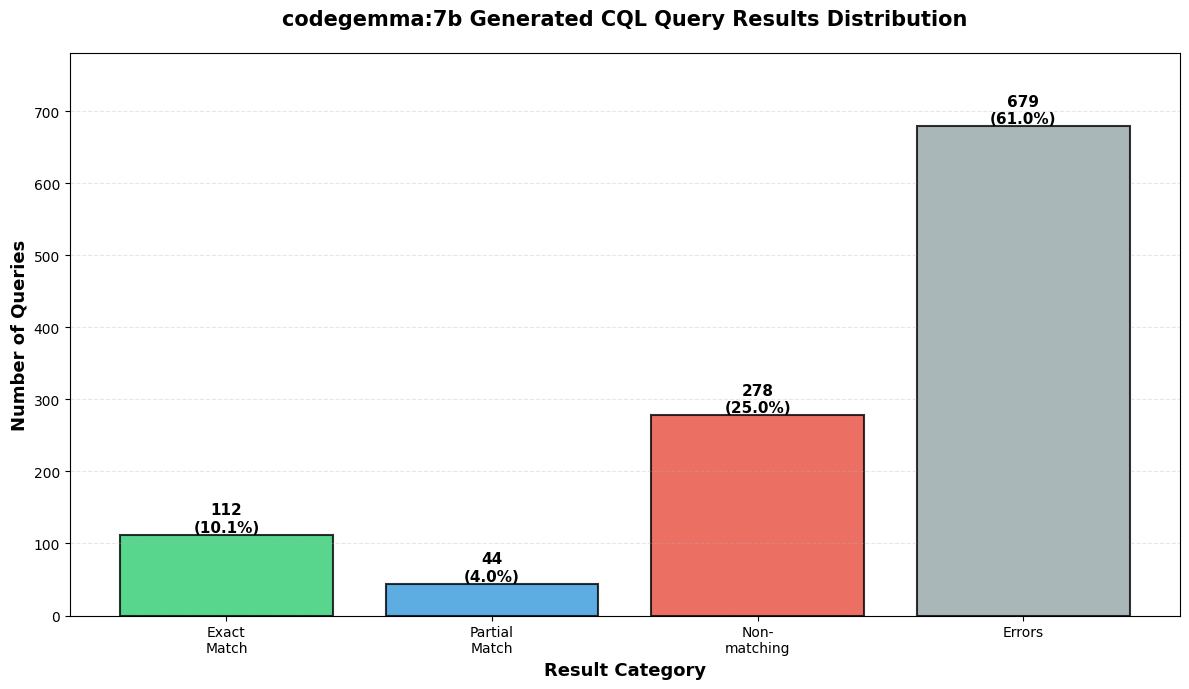

In [7]:
stats = analyze_query_results('codegemma:7b')
print_analysis_summary(stats, 'codegemma:7b')
plot_results_distribution(stats, 'codegemma:7b')

llama3.1:8b

llama3.1:8b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:         135 (12.1%)
Partial Match:        42 (3.8%)
Non-matching:        275 (24.7%)
Errors:              661 (59.4%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   3 (18.8%)
Partial: 0 (0.0%)
Wrong:   0 (0.0%)
Errors:  13 (81.2%)

SEQUENCE:
Total:   288
Exact:   46 (16.0%)
Partial: 3 (1.0%)
Wrong:   105 (36.5%)
Errors:  134 (46.5%)

SIMPLE:
Total:   57
Exact:   27 (47.4%)
Partial: 7 (12.3%)
Wrong:   13 (22.8%)
Errors:  10 (17.5%)

WILDCARD:
Total:   752
Exact:   59 (7.8%)
Partial: 32 (4.3%)
Wrong:   157 (20.9%)
Errors:  504 (67.0%)





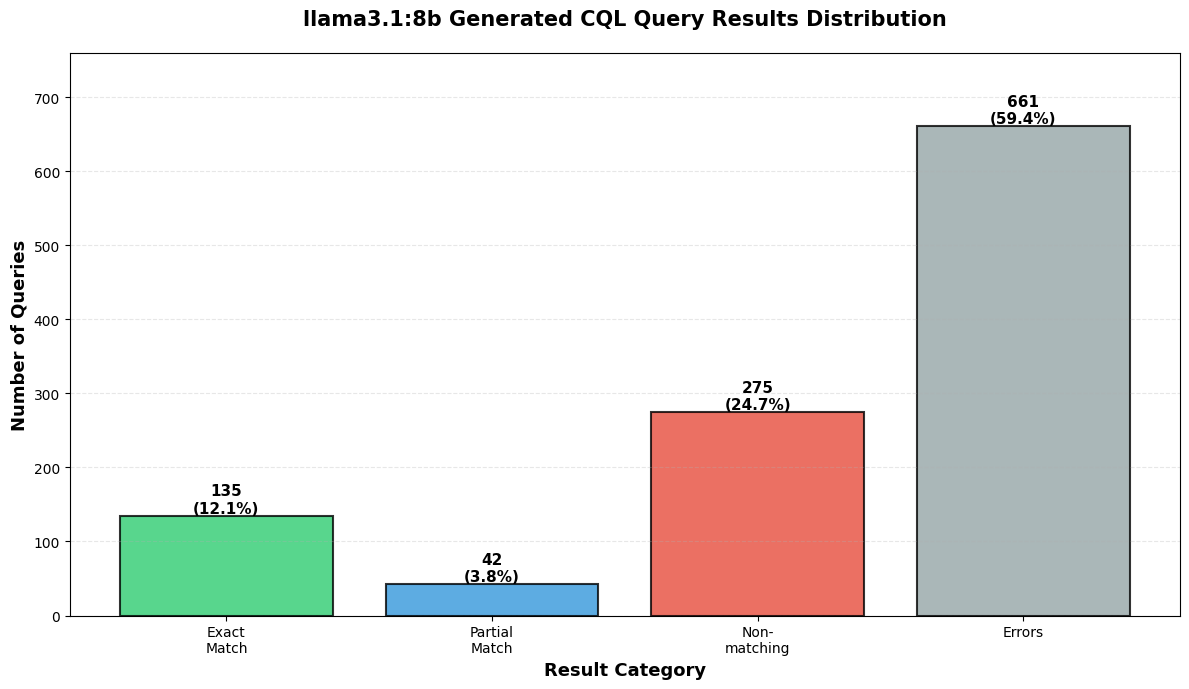

In [8]:
stats = analyze_query_results('llama3.1:8b')
print_analysis_summary(stats, 'llama3.1:8b')
plot_results_distribution(stats, 'llama3.1:8b')

codellama:7b

codellama:7b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:           9 (0.8%)
Partial Match:         5 (0.4%)
Non-matching:       1048 (94.2%)
Errors:               51 (4.6%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   0 (0.0%)
Partial: 0 (0.0%)
Wrong:   16 (100.0%)
Errors:  0 (0.0%)

SEQUENCE:
Total:   288
Exact:   0 (0.0%)
Partial: 1 (0.3%)
Wrong:   247 (85.8%)
Errors:  40 (13.9%)

SIMPLE:
Total:   57
Exact:   9 (15.8%)
Partial: 4 (7.0%)
Wrong:   42 (73.7%)
Errors:  2 (3.5%)

WILDCARD:
Total:   752
Exact:   0 (0.0%)
Partial: 0 (0.0%)
Wrong:   743 (98.8%)
Errors:  9 (1.2%)





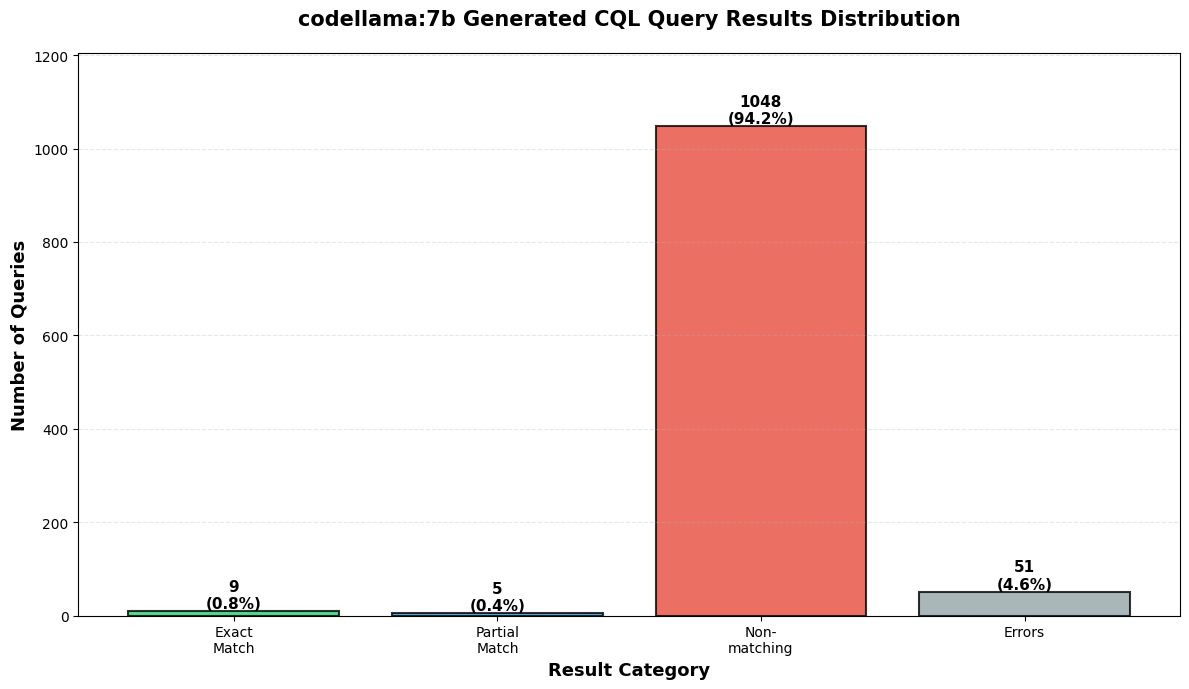

In [9]:
stats = analyze_query_results('codellama:7b')
print_analysis_summary(stats, 'codellama:7b')
plot_results_distribution(stats, 'codellama:7b')

ministral-3:8b

ministral-3:8b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:         557 (50.0%)
Partial Match:       125 (11.2%)
Non-matching:        237 (21.3%)
Errors:              194 (17.4%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   15 (93.8%)
Partial: 1 (6.2%)
Wrong:   0 (0.0%)
Errors:  0 (0.0%)

SEQUENCE:
Total:   288
Exact:   173 (60.1%)
Partial: 5 (1.7%)
Wrong:   53 (18.4%)
Errors:  57 (19.8%)

SIMPLE:
Total:   57
Exact:   47 (82.5%)
Partial: 0 (0.0%)
Wrong:   4 (7.0%)
Errors:  6 (10.5%)

WILDCARD:
Total:   752
Exact:   322 (42.8%)
Partial: 119 (15.8%)
Wrong:   180 (23.9%)
Errors:  131 (17.4%)





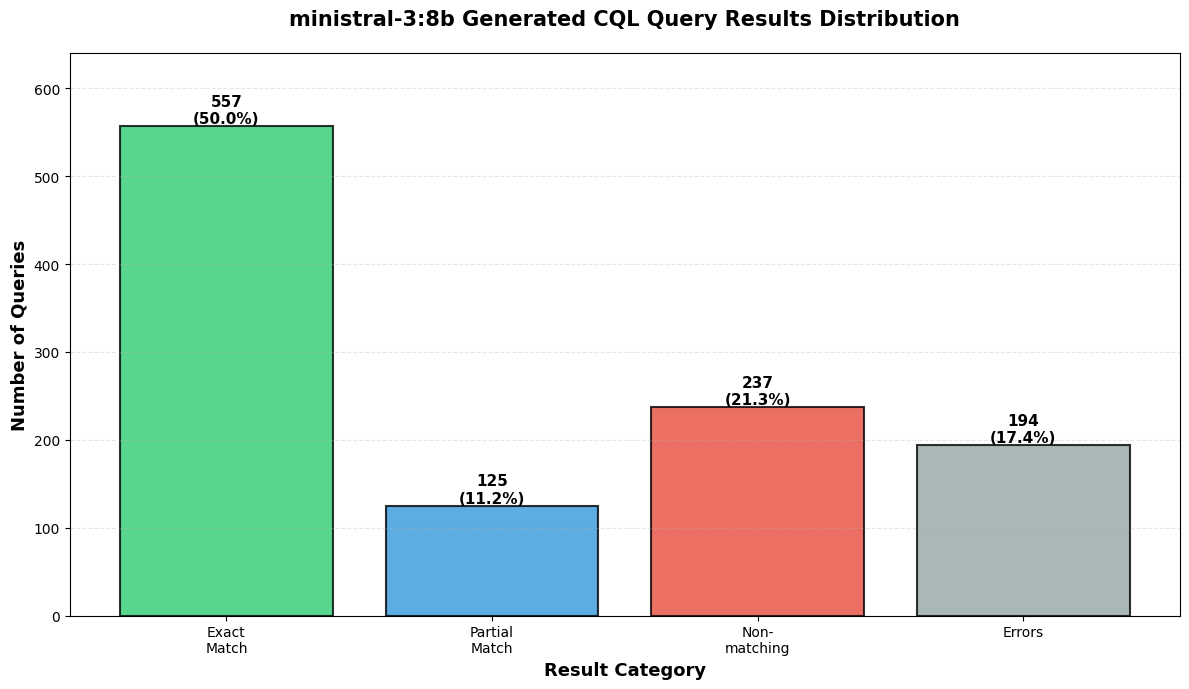

In [10]:
stats = analyze_query_results('ministral-3:8b')
print_analysis_summary(stats, 'ministral-3:8b')
plot_results_distribution(stats, 'ministral-3:8b')

## 4

In [11]:
local_models = [
    'deepseek-coder-v2:16b',
    'deepseek-v2:16b',
    'ministral-3:14b',
    'gemma3:12b'
]

deepseek-coder-v2:16b

deepseek-coder-v2:16b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:         203 (18.2%)
Partial Match:       134 (12.0%)
Non-matching:        444 (39.9%)
Errors:              332 (29.8%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   5 (31.2%)
Partial: 1 (6.2%)
Wrong:   10 (62.5%)
Errors:  0 (0.0%)

SEQUENCE:
Total:   288
Exact:   24 (8.3%)
Partial: 10 (3.5%)
Wrong:   170 (59.0%)
Errors:  84 (29.2%)

SIMPLE:
Total:   57
Exact:   38 (66.7%)
Partial: 4 (7.0%)
Wrong:   5 (8.8%)
Errors:  10 (17.5%)

WILDCARD:
Total:   752
Exact:   136 (18.1%)
Partial: 119 (15.8%)
Wrong:   259 (34.4%)
Errors:  238 (31.6%)





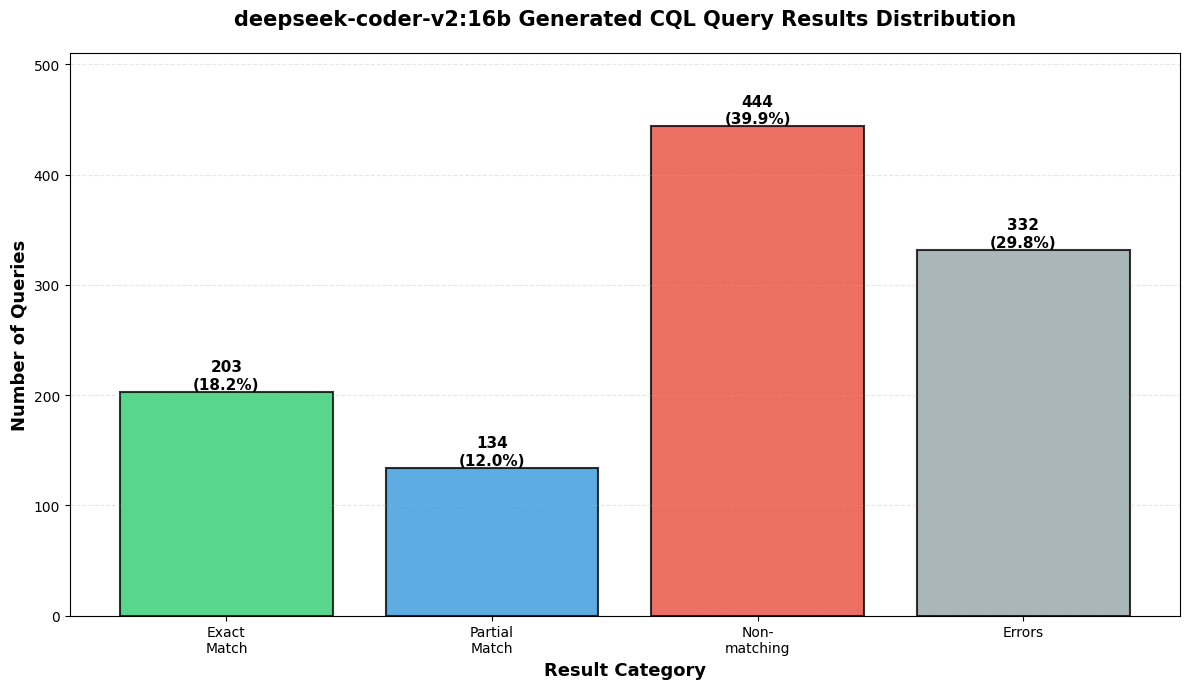

In [12]:
stats = analyze_query_results('deepseek-coder-v2:16b')
print_analysis_summary(stats, 'deepseek-coder-v2:16b')
plot_results_distribution(stats, 'deepseek-coder-v2:16b')

deepseek-v2:16b

deepseek-v2:16b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:          71 (6.4%)
Partial Match:        32 (2.9%)
Non-matching:        314 (28.2%)
Errors:              696 (62.5%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   0 (0.0%)
Partial: 1 (6.2%)
Wrong:   6 (37.5%)
Errors:  9 (56.2%)

SEQUENCE:
Total:   288
Exact:   23 (8.0%)
Partial: 1 (0.3%)
Wrong:   85 (29.5%)
Errors:  179 (62.2%)

SIMPLE:
Total:   57
Exact:   21 (36.8%)
Partial: 9 (15.8%)
Wrong:   16 (28.1%)
Errors:  11 (19.3%)

WILDCARD:
Total:   752
Exact:   27 (3.6%)
Partial: 21 (2.8%)
Wrong:   207 (27.5%)
Errors:  497 (66.1%)





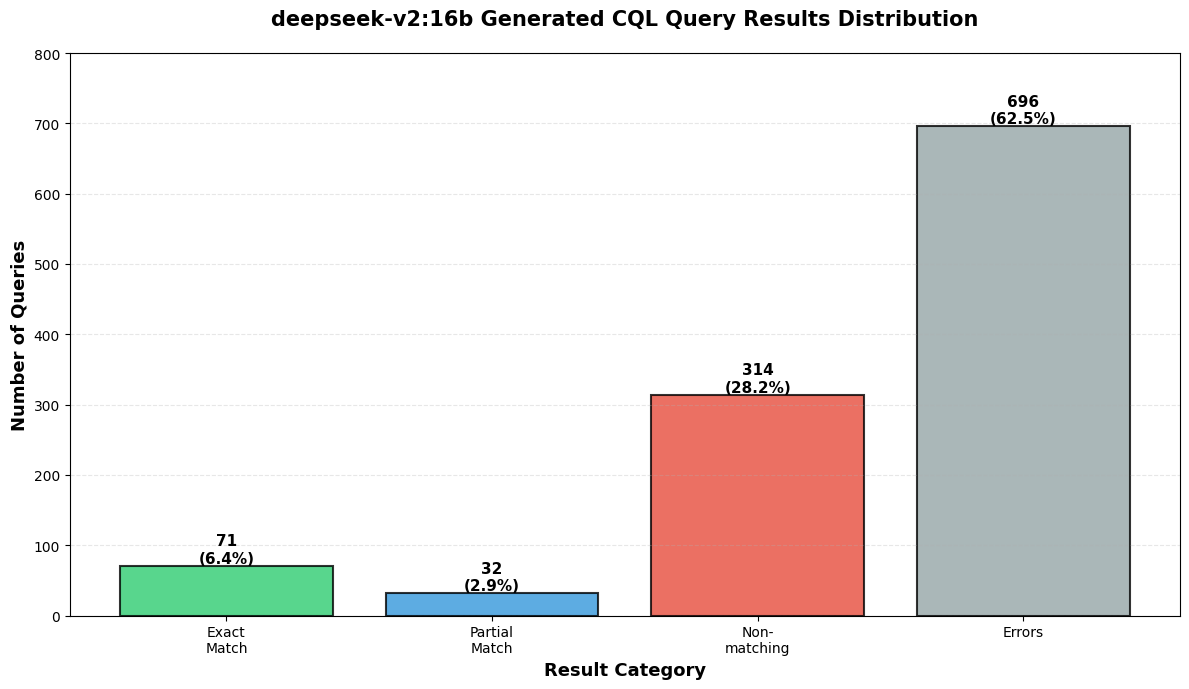

In [13]:
stats = analyze_query_results('deepseek-v2:16b')
print_analysis_summary(stats, 'deepseek-v2:16b')
plot_results_distribution(stats, 'deepseek-v2:16b')

ministral-3:14b

ministral-3:14b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:         673 (60.5%)
Partial Match:       148 (13.3%)
Non-matching:        174 (15.6%)
Errors:              118 (10.6%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   1 (6.2%)
Partial: 0 (0.0%)
Wrong:   0 (0.0%)
Errors:  15 (93.8%)

SEQUENCE:
Total:   288
Exact:   198 (68.8%)
Partial: 16 (5.6%)
Wrong:   53 (18.4%)
Errors:  21 (7.3%)

SIMPLE:
Total:   57
Exact:   47 (82.5%)
Partial: 1 (1.8%)
Wrong:   0 (0.0%)
Errors:  9 (15.8%)

WILDCARD:
Total:   752
Exact:   427 (56.8%)
Partial: 131 (17.4%)
Wrong:   121 (16.1%)
Errors:  73 (9.7%)





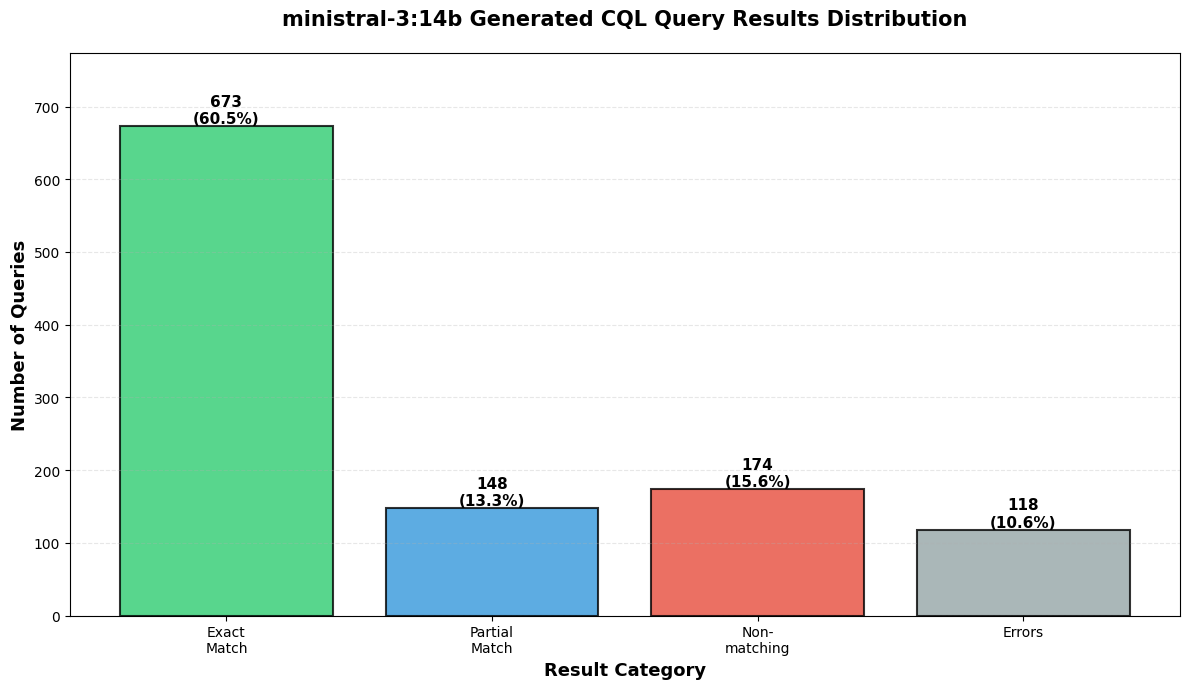

In [14]:
stats = analyze_query_results('ministral-3:14b')
print_analysis_summary(stats, 'ministral-3:14b')
plot_results_distribution(stats, 'ministral-3:14b')

gemma3:12b

gemma3:12b Generated CQL Analysis

Total Queries: 1113

Results Breakdown:
Exact Match:         671 (60.3%)
Partial Match:       122 (11.0%)
Non-matching:        120 (10.8%)
Errors:              200 (18.0%)

Performance by Query Complexity:

COMPLEX:
Total:   16
Exact:   1 (6.2%)
Partial: 0 (0.0%)
Wrong:   0 (0.0%)
Errors:  15 (93.8%)

SEQUENCE:
Total:   288
Exact:   198 (68.8%)
Partial: 3 (1.0%)
Wrong:   29 (10.1%)
Errors:  58 (20.1%)

SIMPLE:
Total:   57
Exact:   51 (89.5%)
Partial: 0 (0.0%)
Wrong:   1 (1.8%)
Errors:  5 (8.8%)

WILDCARD:
Total:   752
Exact:   421 (56.0%)
Partial: 119 (15.8%)
Wrong:   90 (12.0%)
Errors:  122 (16.2%)





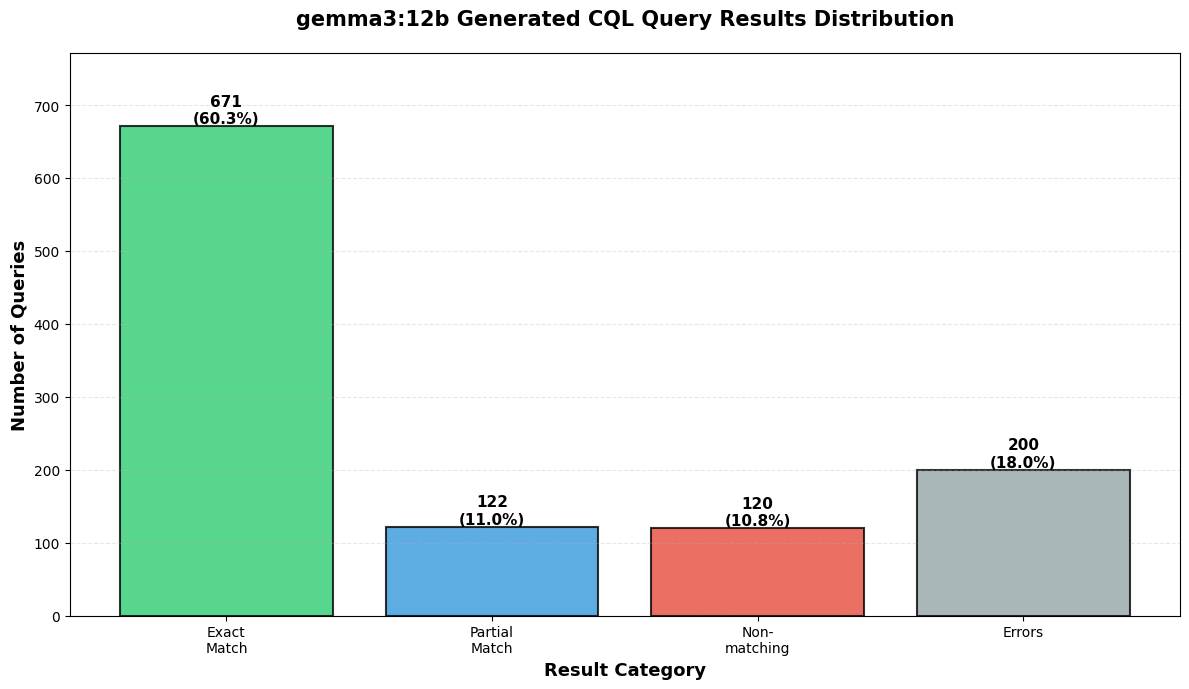

In [15]:
stats = analyze_query_results('gemma3:12b')
print_analysis_summary(stats, 'gemma3:12b')
plot_results_distribution(stats, 'gemma3:12b')